In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv('../data/raw/hotel_reservations.csv')
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### booking_status based on room_type_reserved and type_of_meal_plan

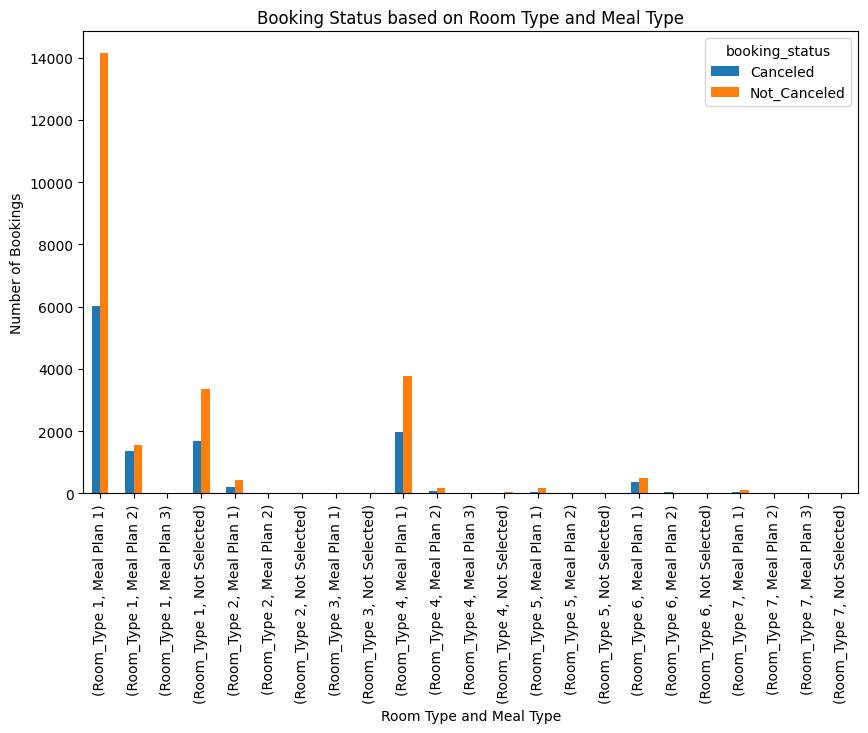

In [32]:
# Plot the booking_status based on room type and meal type
data.groupby(['room_type_reserved', 'type_of_meal_plan', 'booking_status']).size().unstack().plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Booking Status based on Room Type and Meal Type')
plt.xlabel('Room Type and Meal Type')
plt.ylabel('Number of Bookings')

plt.savefig('../reports/additional/booking_status_based_on_room_type_and_meal_type.png')
plt.show()

## Booking_status based on no_of_weekend_nights and no_of_week_nights

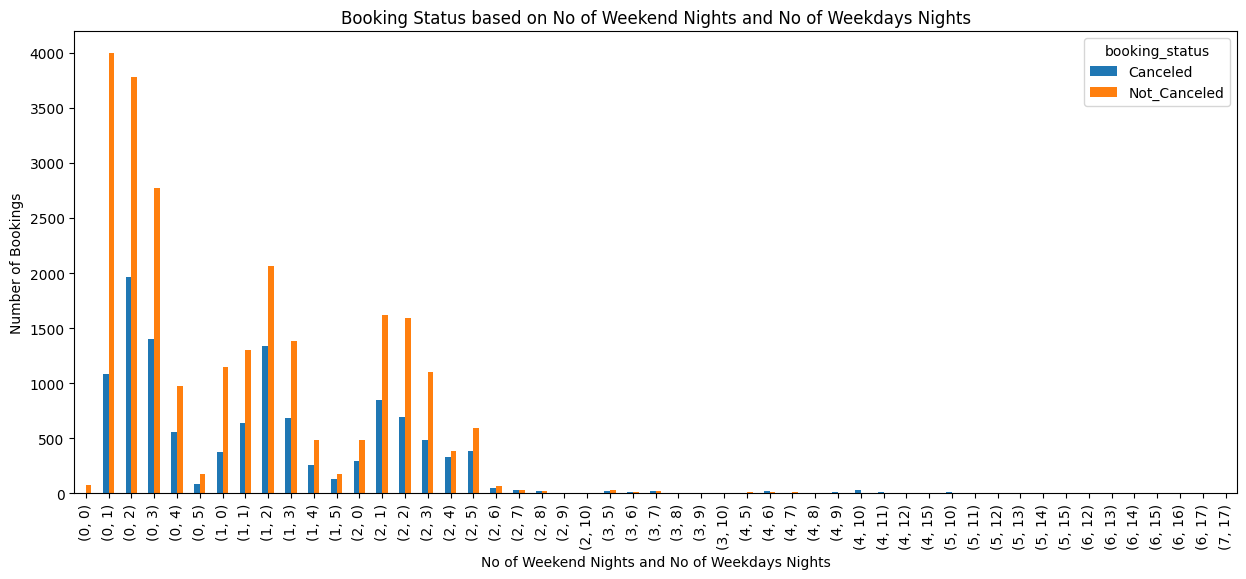

In [33]:
# Plot the booking_status based on no_of_weekend_nights and no_of_weekdays_nights
data.groupby(['no_of_weekend_nights', 'no_of_week_nights', 'booking_status']).size().unstack().plot(kind='bar', stacked=False, figsize=(15, 6))
plt.title('Booking Status based on No of Weekend Nights and No of Weekdays Nights')
plt.xlabel('No of Weekend Nights and No of Weekdays Nights')
plt.ylabel('Number of Bookings')

plt.savefig('../reports/additional/booking_status_based_on_no_of_weekend_nights_and_no_of_weekdays_nights.png')
plt.show()

## Month distribution

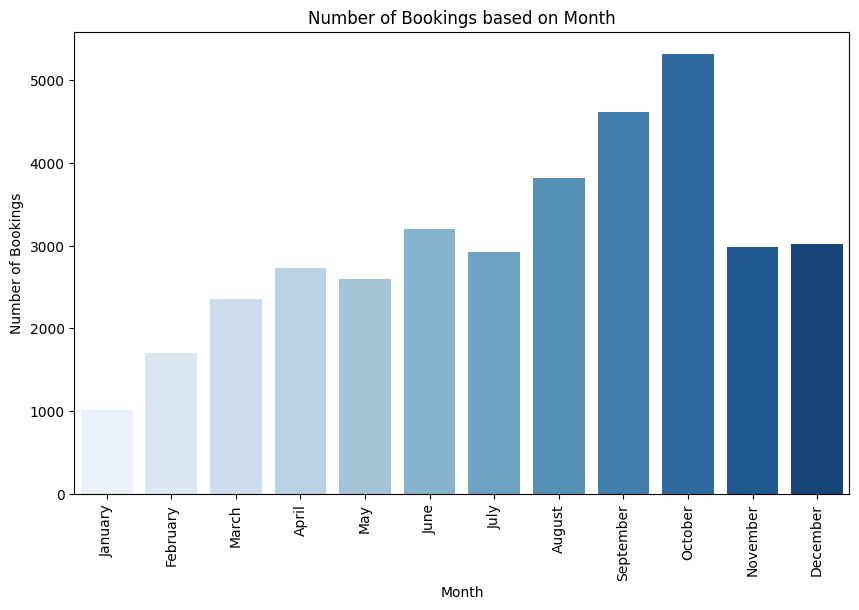

In [46]:
months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
month_values = {}

for month in months:
    month_values[months[month]] = data[data['arrival_month'] == month].shape[0]
    
plt.figure(figsize=(10, 6))
sns.barplot(x=list(month_values.keys()), y=list(month_values.values()), palette='Blues', hue=list(month_values.keys()))
plt.title('Number of Bookings based on Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')

plt.xticks(rotation=90)

plt.savefig('../reports/additional/number_of_bookings_based_on_month.png')
plt.show()

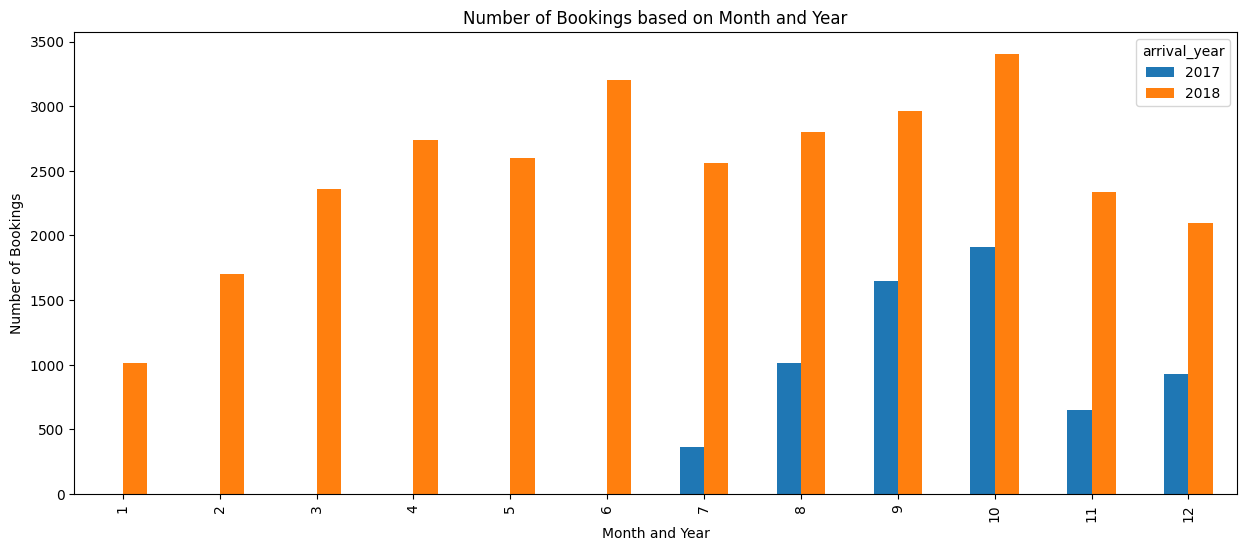

In [59]:
# Plot the month distributin considering year
data.groupby(['arrival_month', 'arrival_year']).size().unstack().plot(kind='bar', stacked=False, figsize=(15, 6))
plt.title('Number of Bookings based on Month and Year')
plt.xlabel('Month and Year')
plt.ylabel('Number of Bookings')

plt.savefig('../reports/additional/number_of_bookings_based_on_month_and_year.png')
plt.show()

### Booking_status based on room type reserved and number of children

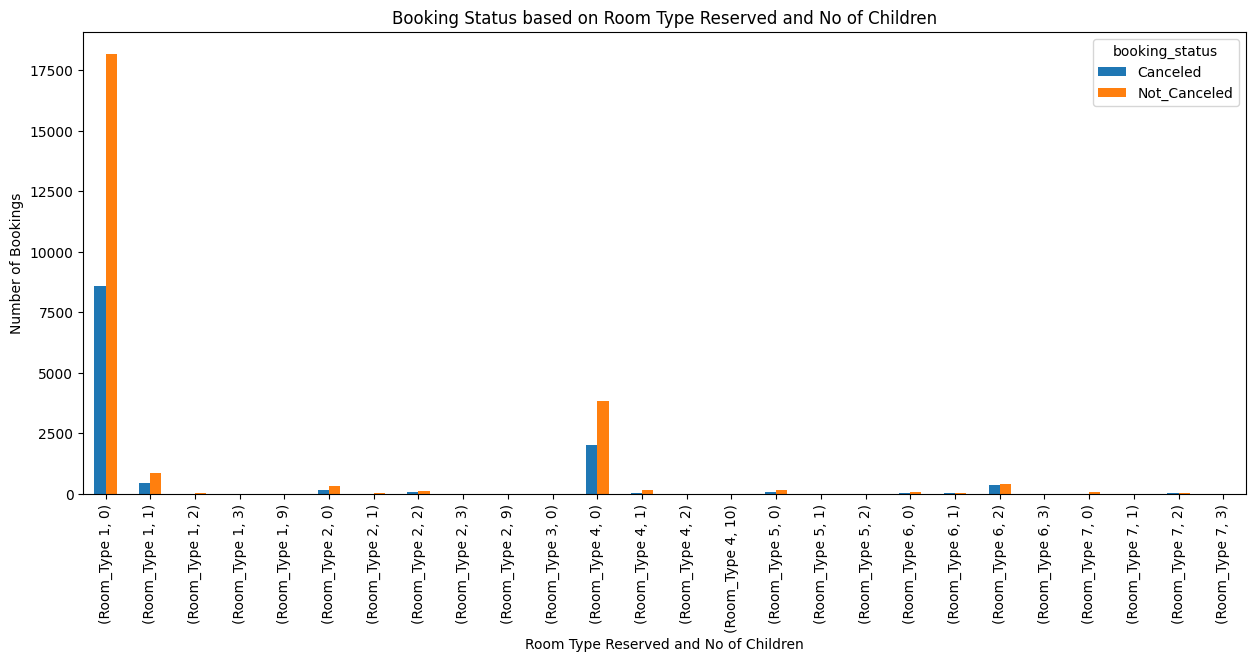

In [60]:
# Plot the booking_status based on room_type_reserved and no_of_children
data.groupby(['room_type_reserved', 'no_of_children', 'booking_status']).size().unstack().plot(kind='bar', stacked=False, figsize=(15, 6))
plt.title('Booking Status based on Room Type Reserved and No of Children')
plt.xlabel('Room Type Reserved and No of Children')
plt.ylabel('Number of Bookings')

plt.savefig('../reports/additional/booking_status_based_on_room_type_reserved_and_no_of_children.png')
plt.show()

## Does number of children have inpact on booking_status

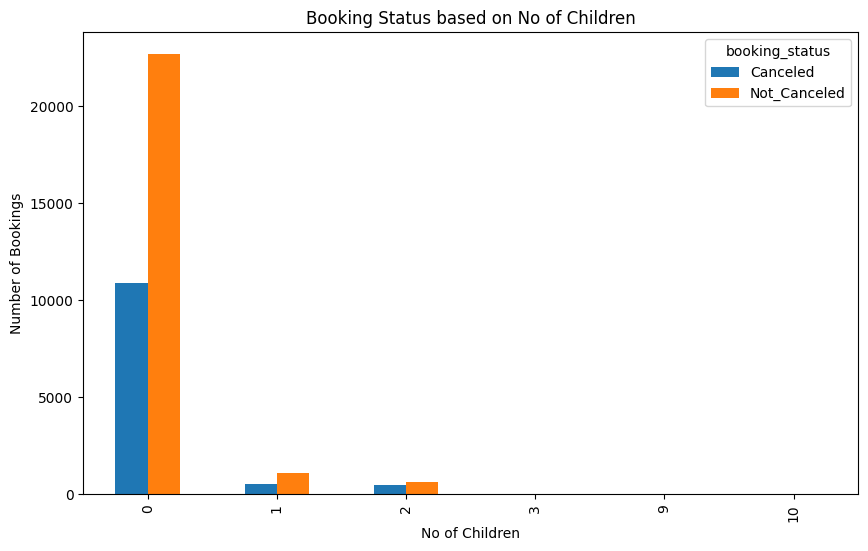

In [50]:
# Plot the booking_status based on no_of_children
data.groupby(['no_of_children', 'booking_status']).size().unstack().plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Booking Status based on No of Children')
plt.xlabel('No of Children')
plt.ylabel('Number of Bookings')

plt.savefig('../reports/additional/booking_status_based_on_no_of_children.png')
plt.show()

## Does lead_time have impact on booking_status

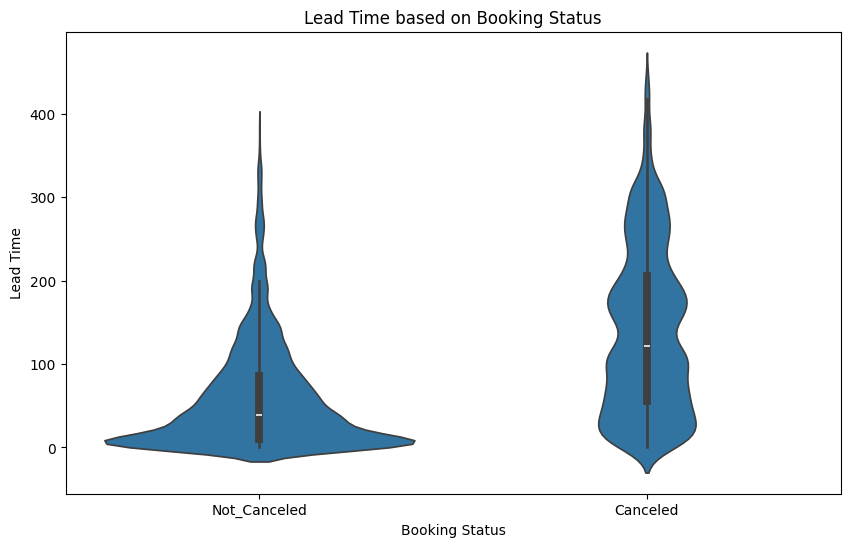

In [49]:
# plot the violin plot for lead_time based on booking_status
plt.figure(figsize=(10, 6))
sns.violinplot(x='booking_status', y='lead_time', data=data)
plt.title('Lead Time based on Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Lead Time')

plt.savefig('../reports/additional/lead_time_based_on_booking_status.png')
plt.show()

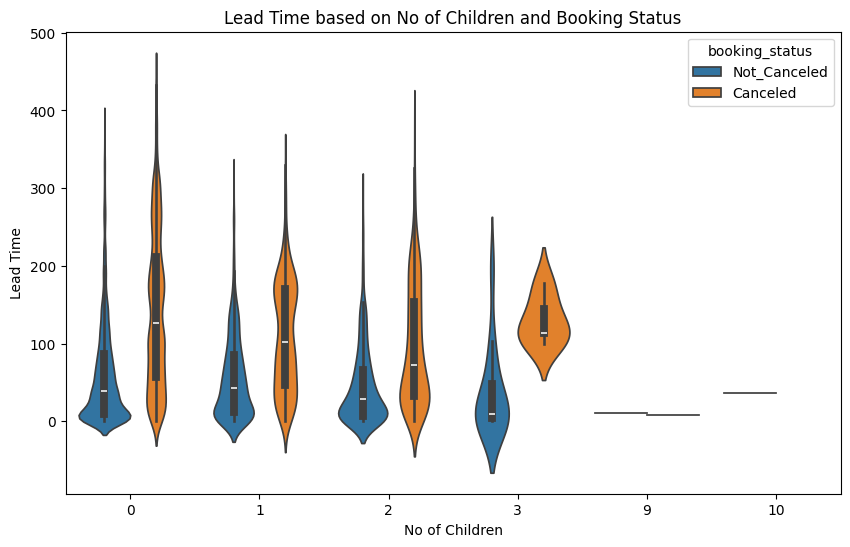

In [51]:
# plot the violin plot for lead_time based and no_of_children on booking_status
plt.figure(figsize=(10, 6))
sns.violinplot(x='no_of_children', y='lead_time', hue='booking_status', data=data)
plt.title('Lead Time based on No of Children and Booking Status')
plt.xlabel('No of Children')
plt.ylabel('Lead Time')

plt.savefig('../reports/additional/lead_time_based_on_no_of_children_and_booking_status.png')
plt.show()

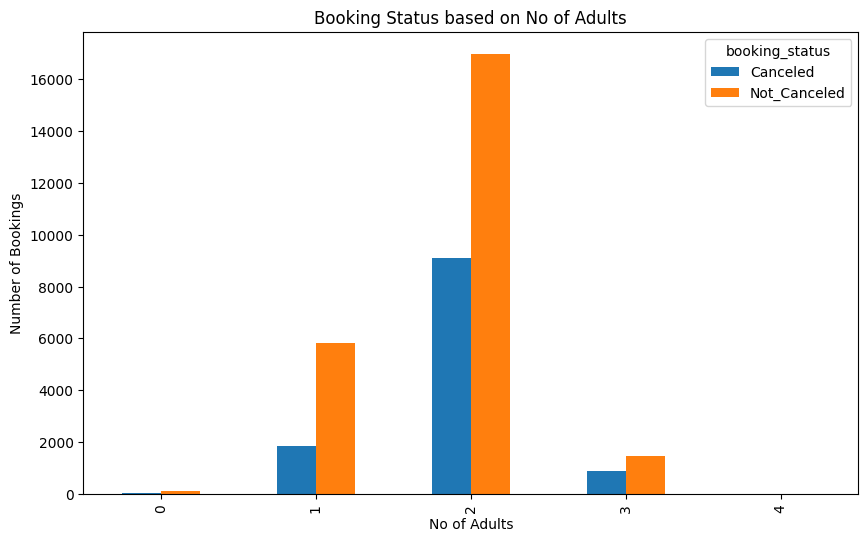

In [61]:
# Plot the no_of_adults based on booking_status
data.groupby(['no_of_adults', 'booking_status']).size().unstack().plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Booking Status based on No of Adults')
plt.xlabel('No of Adults')
plt.ylabel('Number of Bookings')

# plt.savefig('../reports/additional/booking_status_based_on_no_of_adults.png')
plt.show()

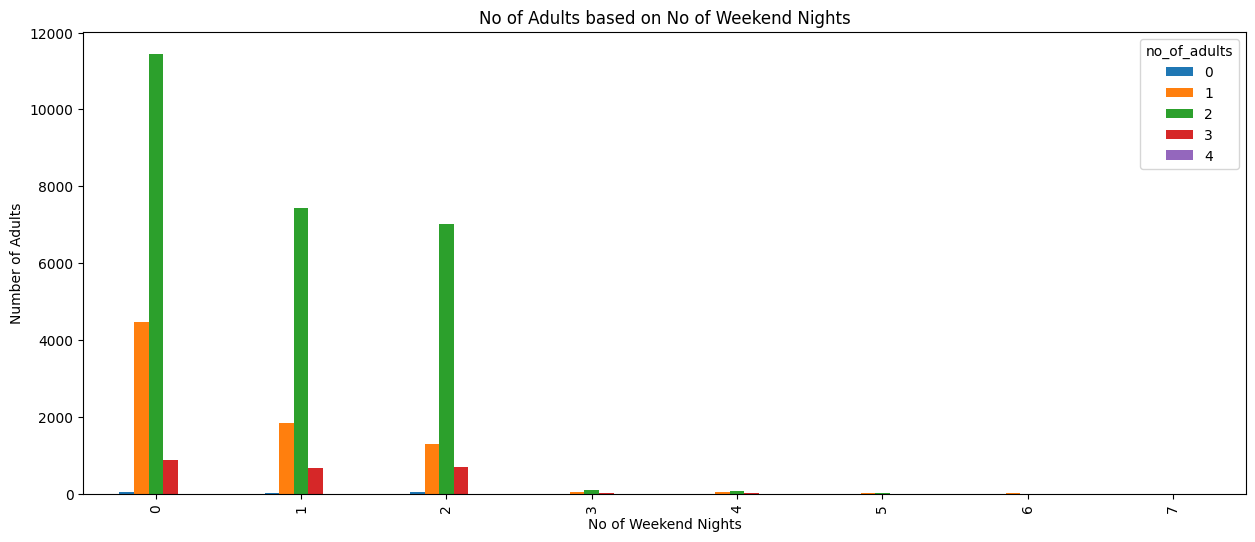

In [62]:
# Display no_of_adults based on no_of_weekend_nights
data.groupby(['no_of_weekend_nights', 'no_of_adults']).size().unstack().plot(kind='bar', stacked=False, figsize=(15, 6))
plt.title('No of Adults based on No of Weekend Nights')
plt.xlabel('No of Weekend Nights')
plt.ylabel('Number of Adults')

# plt.savefig('../reports/additional/no_of_adults_based_on_no_of_weekend_nights.png')
plt.show()

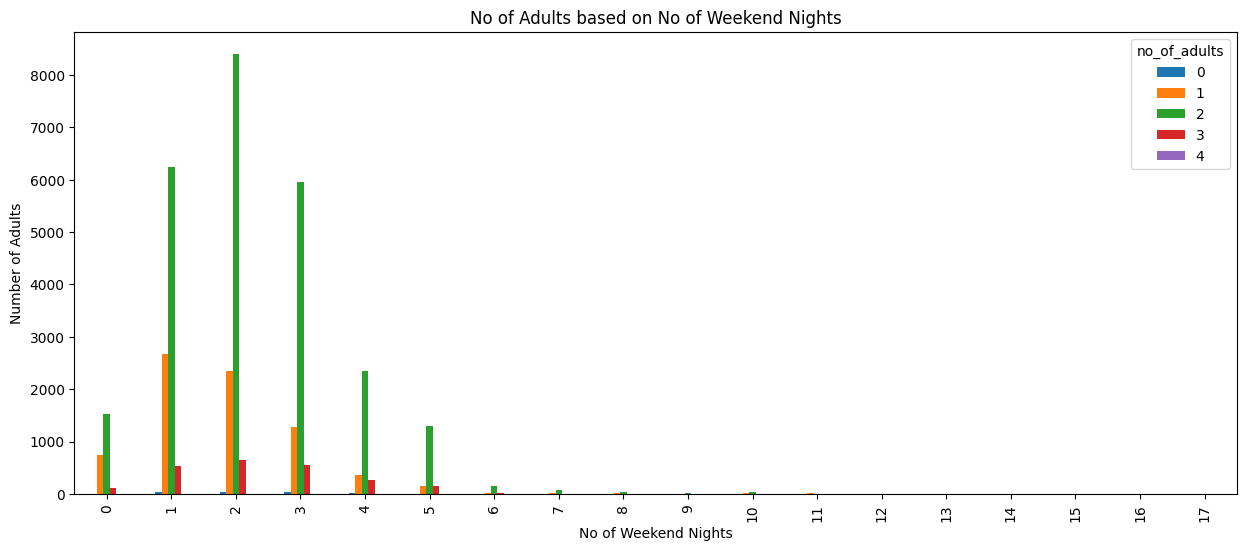

In [63]:
# Display no_of_adults based on no_of_weekend_nights
data.groupby(['no_of_week_nights', 'no_of_adults']).size().unstack().plot(kind='bar', stacked=False, figsize=(15, 6))
plt.title('No of Adults based on No of Weekend Nights')
plt.xlabel('No of Weekend Nights')
plt.ylabel('Number of Adults')

plt.show()